In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_heart_stroke_data.csv to cleaned_heart_stroke_data.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset (update the path as needed)
df = pd.read_csv('cleaned_heart_stroke_data.csv')

**I. General Tasks (Data Visualization)**

1. Frame Questions

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**1)How does age relate to the likelihood of stroke?**

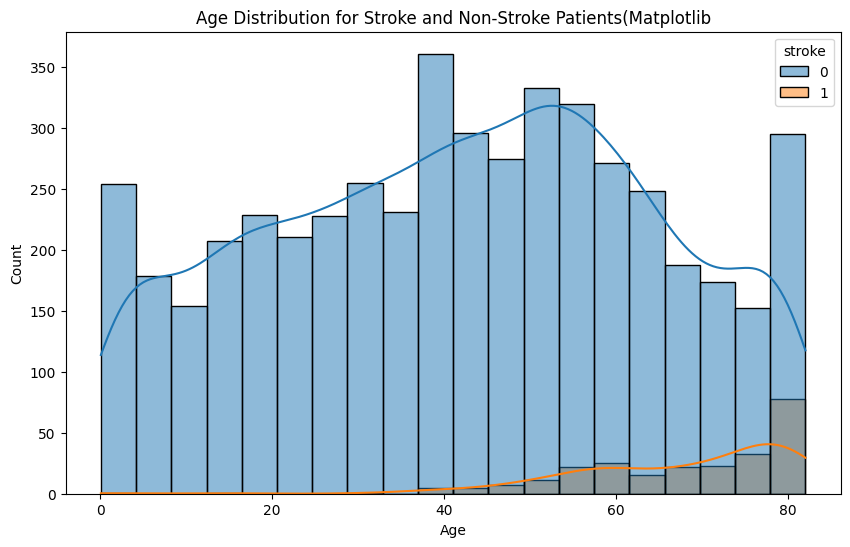

In [ ]:
# Distribution of age among stroke and non-stroke patients Using Matplotlib
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='stroke', kde=True)
plt.title('Age Distribution for Stroke and Non-Stroke Patients(Matplotlib')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

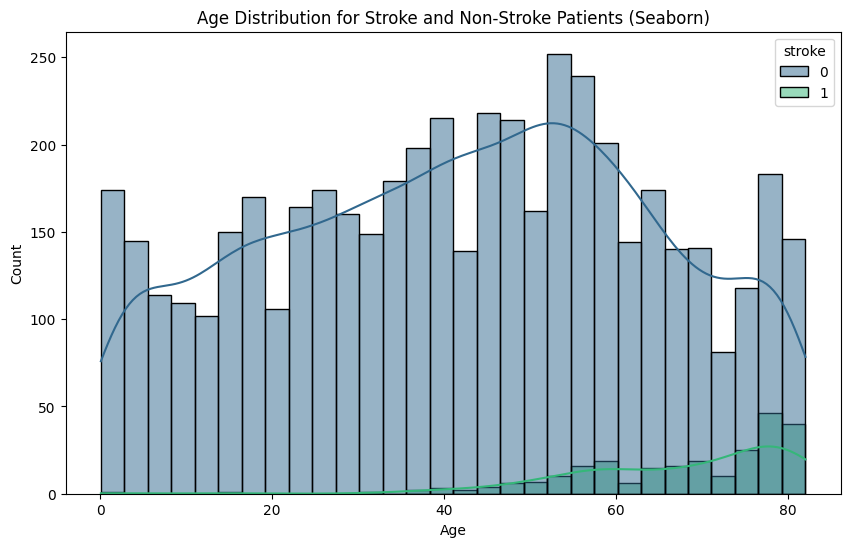

In [ ]:
# Using Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30, palette='viridis')
plt.title('Age Distribution for Stroke and Non-Stroke Patients (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Age Distribution: Older individuals show a higher incidence of strokes

**Observation:**

Stroke occurrences increase significantly with age, with older individuals having a much higher risk.
A majority of stroke cases are concentrated in individuals over 50, indicating age as a strong risk factor.

2)Is there any correlation between BMI and stroke incidence or risk?

<ipython-input-39-04ee188c336f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')


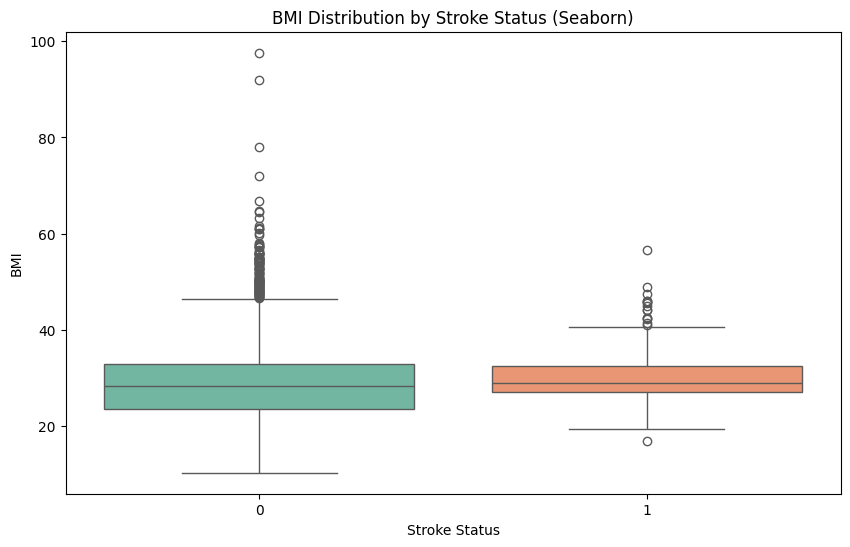

In [ ]:
# Boxplot of BMI by stroke status
# Using Seaborn
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke Status (Seaborn)')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.show()

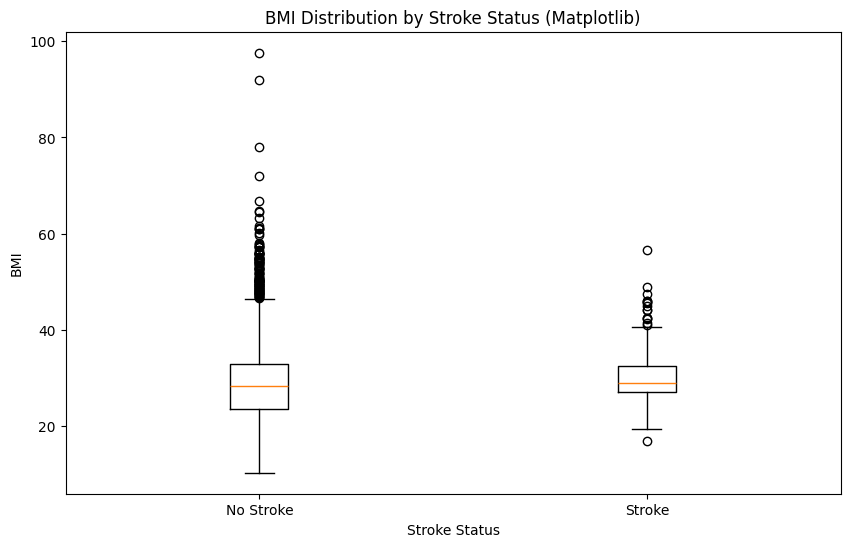

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10,6))
plt.boxplot([df[df['stroke'] == 0]['bmi'], df[df['stroke'] == 1]['bmi']], labels=['No Stroke', 'Stroke'])
plt.title('BMI Distribution by Stroke Status (Matplotlib)')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.show()

BMI Levels: Higher BMI levels may correlate with stroke, but further analysis is needed to confirm this.

**Observation:**

Individuals who experienced a stroke tend to have a higher median BMI compared to non-stroke patients.
There are significant outliers in BMI for stroke patients, which might indicate that very high BMI values correlate with increased stroke risk.

**3)How does glucose level impact stroke risk?** (or)
**What is the relationship between glucose levels and stroke occurrence?**

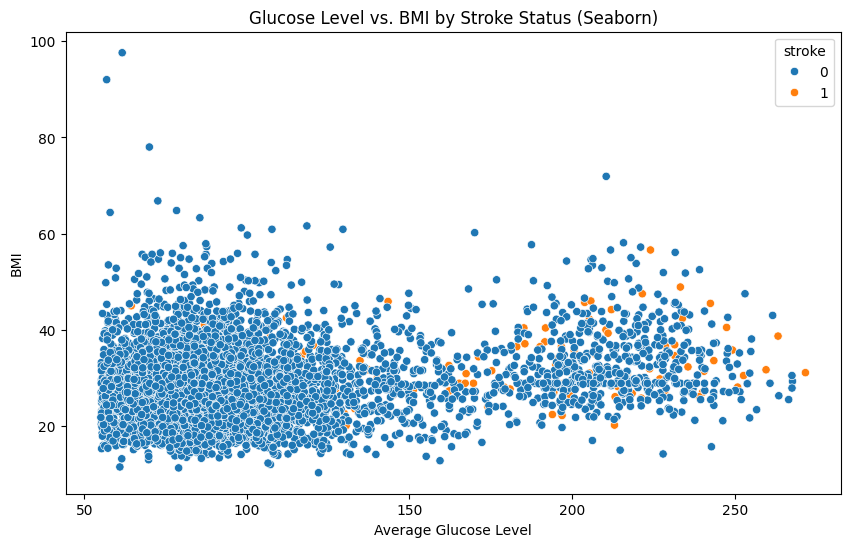

In [ ]:
# Scatterplot of average glucose level and BMI by stroke status
# Using Seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke')
plt.title('Glucose Level vs. BMI by Stroke Status (Seaborn)')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.show()

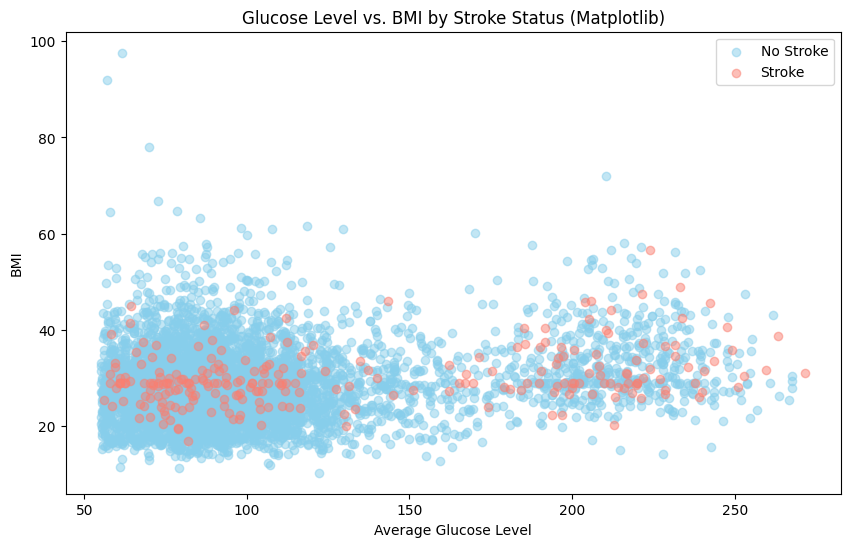

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10,6))
plt.scatter(df[df['stroke'] == 0]['avg_glucose_level'], df[df['stroke'] == 0]['bmi'], alpha=0.5, label='No Stroke', color='skyblue')
plt.scatter(df[df['stroke'] == 1]['avg_glucose_level'], df[df['stroke'] == 1]['bmi'], alpha=0.5, label='Stroke', color='salmon')
plt.title('Glucose Level vs. BMI by Stroke Status (Matplotlib)')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend()
plt.show()

Glucose and BMI: Elevated glucose levels tend to correlate with higher stroke risk, especially in individuals with higher BMI.

**Observation:**

Higher glucose levels tend to be associated with stroke patients, especially in those with higher BMI values.
The combination of high glucose and high BMI may indicate a higher risk for stroke.


**4)How do smoking habits influence stroke rates?**

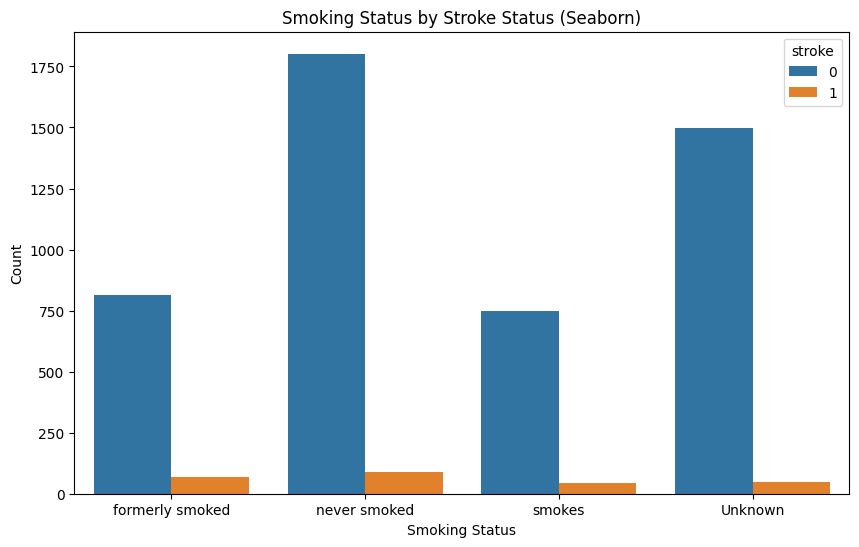

In [ ]:
# Countplot for smoking status among stroke and non-stroke patients
# Using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Smoking Status by Stroke Status (Seaborn)')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

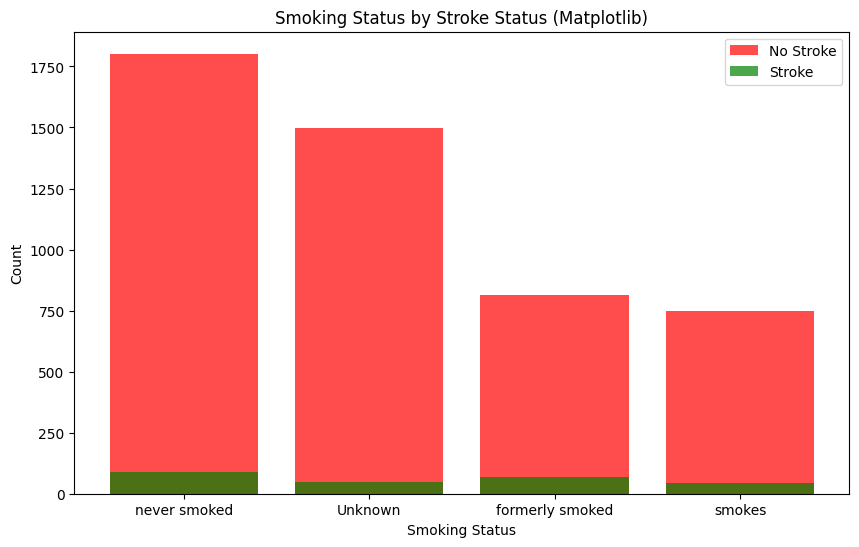

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10,6))
no_stroke = df[df['stroke'] == 0]['smoking_status'].value_counts()
stroke = df[df['stroke'] == 1]['smoking_status'].value_counts()
plt.bar(no_stroke.index, no_stroke.values, alpha=0.7, label='No Stroke', color='red')
plt.bar(stroke.index, stroke.values, alpha=0.7, label='Stroke', color='green')
plt.title('Smoking Status by Stroke Status (Matplotlib)')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend()
plt.show()

Smoking Status: Stroke incidence varies across smoking categories, possibly higher among current/former smokers.

**Observation:**

The percentage of current smokers among stroke patients is relatively high compared to non-smokers and former smokers.
Smoking appears to be a potential contributing factor to stroke, although more analysis is needed to confirm.

**5)What is the combined effect of hypertension and heart disease on stroke risk?**

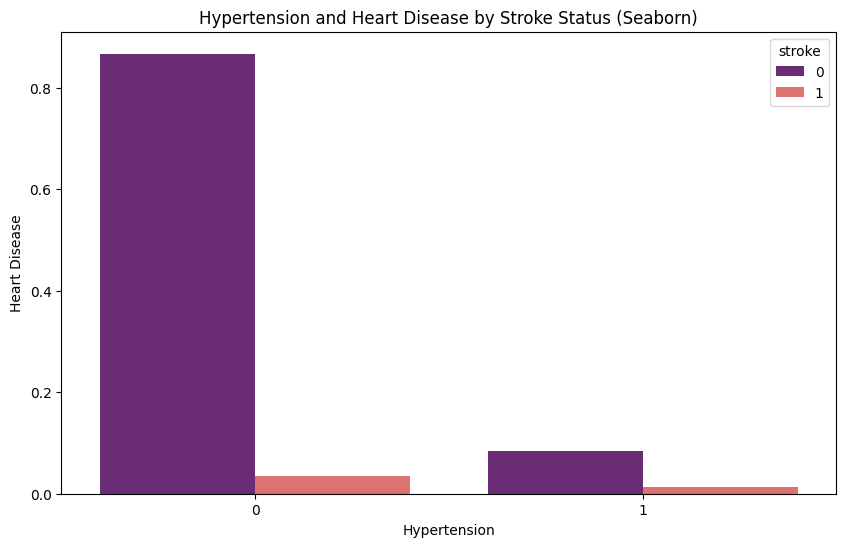

In [ ]:
# Barplot of hypertension and heart disease by stroke status
# Using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='hypertension', y='heart_disease', hue='stroke', estimator=lambda x: len(x) / len(df), palette='magma')
plt.title('Hypertension and Heart Disease by Stroke Status (Seaborn)')
plt.xlabel('Hypertension')
plt.ylabel('Heart Disease')
plt.show()

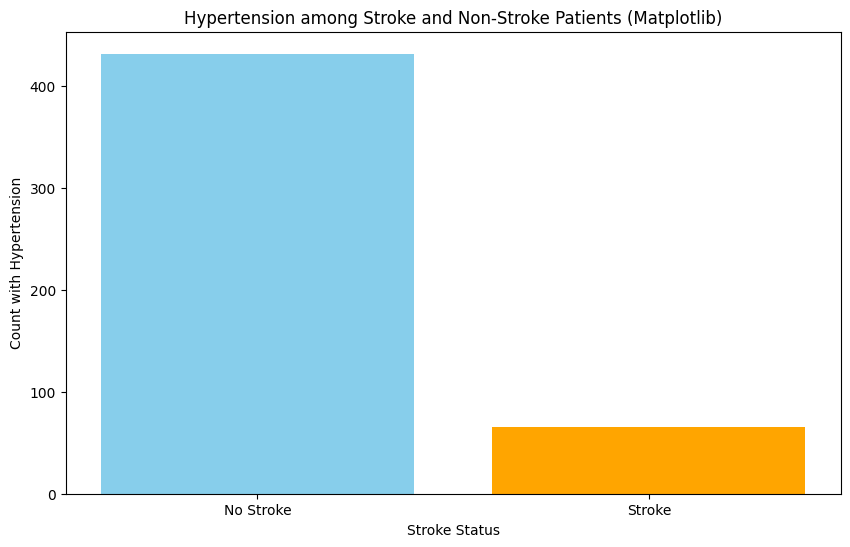

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10,6))
hypertension_no_stroke = df[(df['hypertension'] == 1) & (df['stroke'] == 0)].shape[0]
hypertension_stroke = df[(df['hypertension'] == 1) & (df['stroke'] == 1)].shape[0]
plt.bar(['No Stroke', 'Stroke'], [hypertension_no_stroke, hypertension_stroke], color=['skyblue', 'orange'])
plt.title('Hypertension among Stroke and Non-Stroke Patients (Matplotlib)')
plt.xlabel('Stroke Status')
plt.ylabel('Count with Hypertension')
plt.show()

Hypertension and Heart Disease: Both conditions appear more frequently in stroke cases.


**Observation:**

Stroke patients show a higher prevalence of both hypertension and heart disease.
Both conditions likely contribute to stroke risk, with a notable correlation in the data.

**6) What is the gender distribution among stroke and non-stroke patients?**

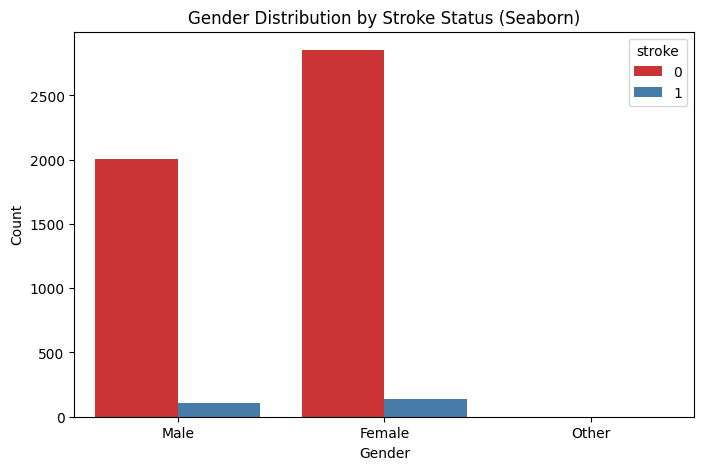

In [ ]:
# Using Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='gender', hue='stroke', palette='Set1')
plt.title('Gender Distribution by Stroke Status (Seaborn)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

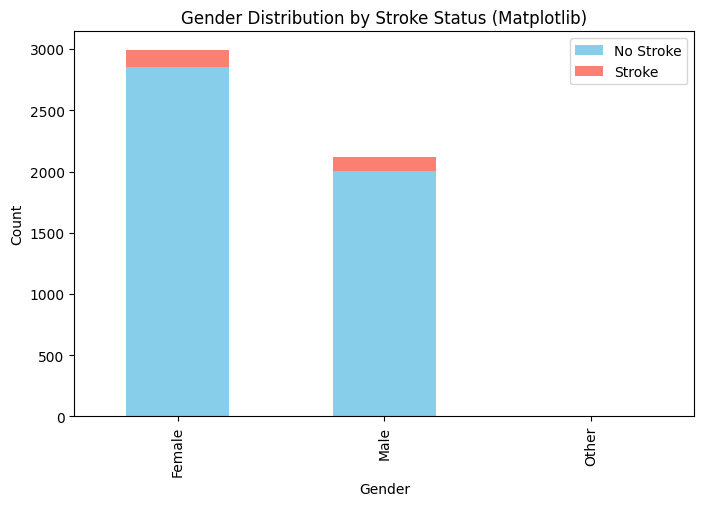

In [ ]:
# Using Matplotlib
gender_counts = df.groupby(['gender', 'stroke']).size().unstack()
gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8,5))
plt.title('Gender Distribution by Stroke Status (Matplotlib)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

**Observation:**

Stroke occurrences appear slightly higher in one gender, which could suggest gender as a risk factor.
However, the distribution is fairly balanced, so gender alone may not be a strong indicator of stroke risk.

**7)What is the distribution of average glucose levels among stroke and non-stroke patients?**

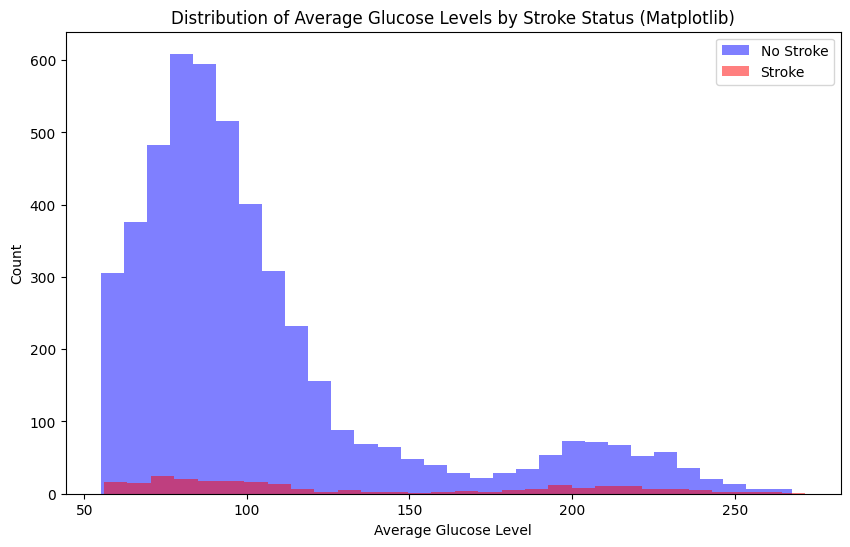

In [ ]:
# Using Matplotlib: Histogram
plt.figure(figsize=(10,6))
plt.hist(df[df['stroke'] == 0]['avg_glucose_level'], bins=30, alpha=0.5, label='No Stroke', color='blue')
plt.hist(df[df['stroke'] == 1]['avg_glucose_level'], bins=30, alpha=0.5, label='Stroke', color='red')
plt.title('Distribution of Average Glucose Levels by Stroke Status (Matplotlib)')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.legend()
plt.show()

Observation:

In the histogram, it’s evident that there’s a significant number of high glucose values among stroke patients, suggesting that elevated glucose levels may be a risk factor for stroke.

**8) What is the relationship between age and average glucose level, categorized by stroke status?**

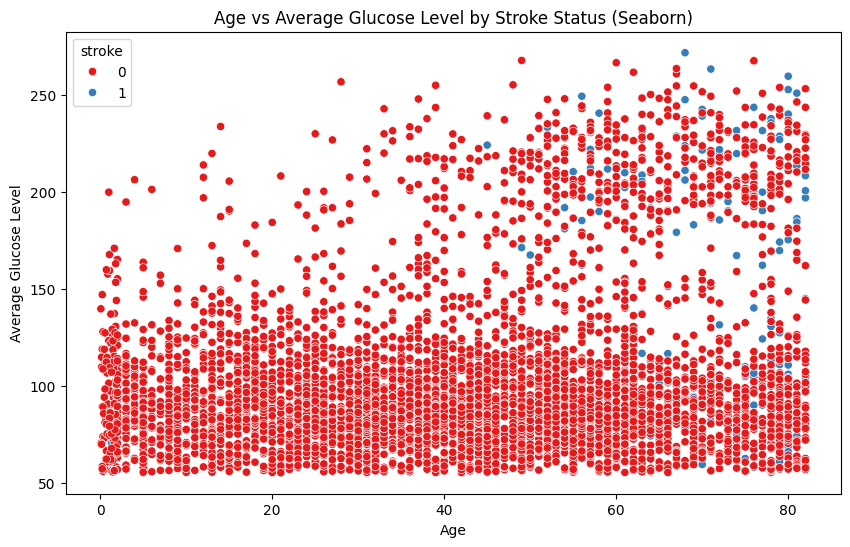

In [ ]:
# Using Seaborn: Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', palette='Set1')
plt.title('Age vs Average Glucose Level by Stroke Status (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

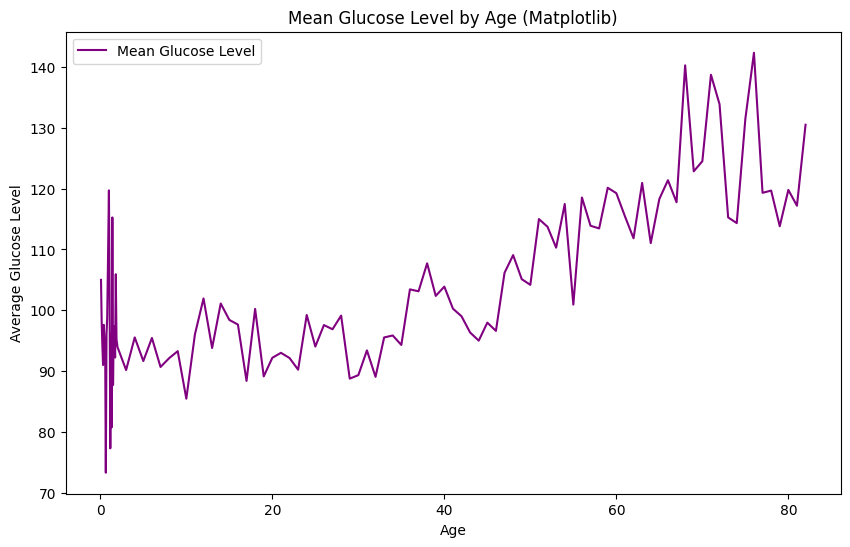

In [ ]:
# Using Matplotlib: Line Plot (for Mean Glucose by Age)
age_mean_glucose = df.groupby('age')['avg_glucose_level'].mean()
plt.figure(figsize=(10,6))
plt.plot(age_mean_glucose.index, age_mean_glucose.values, color='purple', label='Mean Glucose Level')
plt.title('Mean Glucose Level by Age (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend()
plt.show()

**Observation:**

The scatter plot shows a pattern where older patients with high glucose levels are more likely to have had a stroke.
The line plot indicates that the average glucose level generally increases with age, which may be a risk factor combined with other conditions.

**9) How does BMI distribution vary by gender and stroke status?**

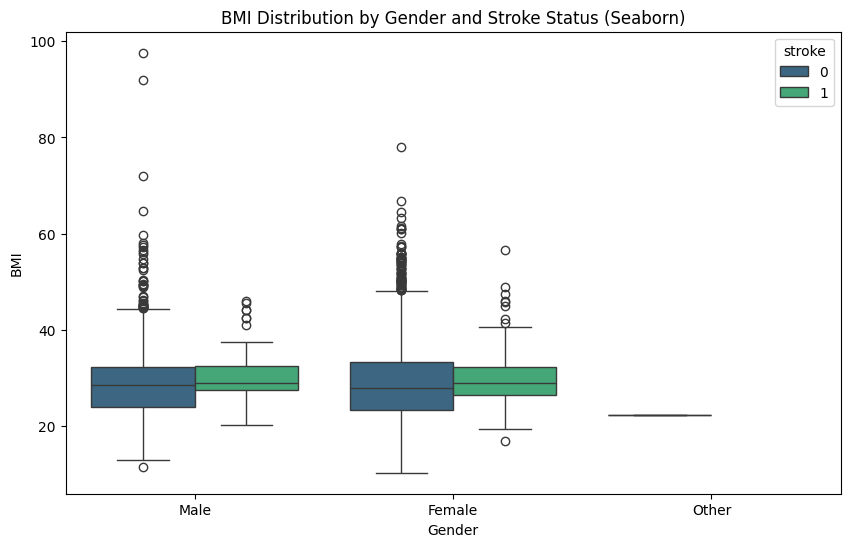

In [ ]:
# Using Seaborn: Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='gender', y='bmi', hue='stroke', palette='viridis')
plt.title('BMI Distribution by Gender and Stroke Status (Seaborn)')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

Observation:

The box plot shows that both male and female stroke patients tend to have a higher median BMI compared to non-stroke patients.

**10) Is there a relationship between smoking status and age for stroke patients?**

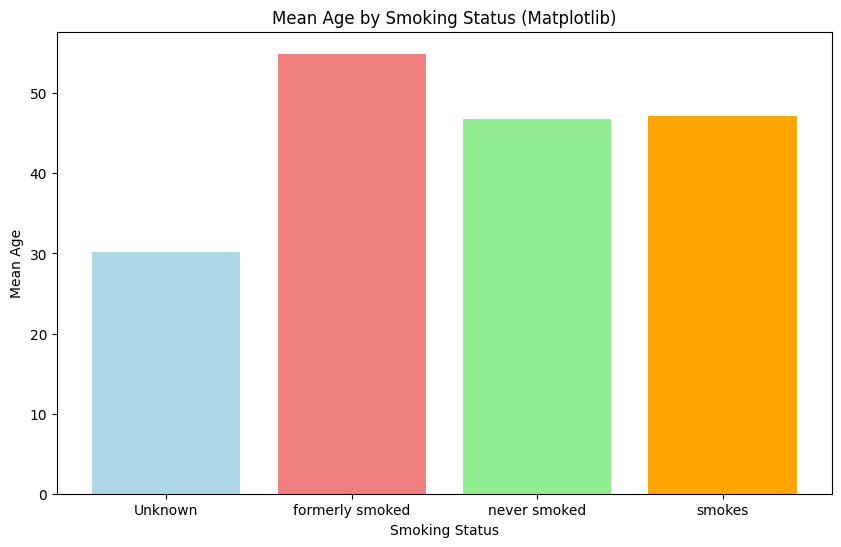

In [ ]:
# Using Matplotlib: Bar Plot for Mean Age by Smoking Status
smoking_mean_age = df.groupby('smoking_status')['age'].mean()
plt.figure(figsize=(10,6))
plt.bar(smoking_mean_age.index, smoking_mean_age.values, color=['lightblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Mean Age by Smoking Status (Matplotlib)')
plt.xlabel('Smoking Status')
plt.ylabel('Mean Age')
plt.show()

**Observation:**


The bar plot of mean age indicates that former smokers have a slightly higher mean age, potentially contributing to stroke risk as age and smoking together increase stroke likelihood.

**11) How do hypertension and heart disease jointly affect stroke risk?**

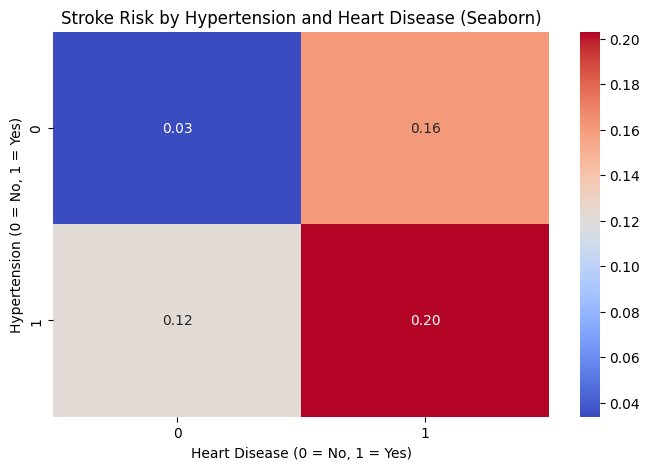

In [ ]:
# Using Seaborn: Heatmap
stroke_risk_matrix = pd.crosstab(df['hypertension'], df['heart_disease'], values=df['stroke'], aggfunc='mean').fillna(0)
plt.figure(figsize=(8,5))
sns.heatmap(stroke_risk_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Stroke Risk by Hypertension and Heart Disease (Seaborn)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Hypertension (0 = No, 1 = Yes)')
plt.show()

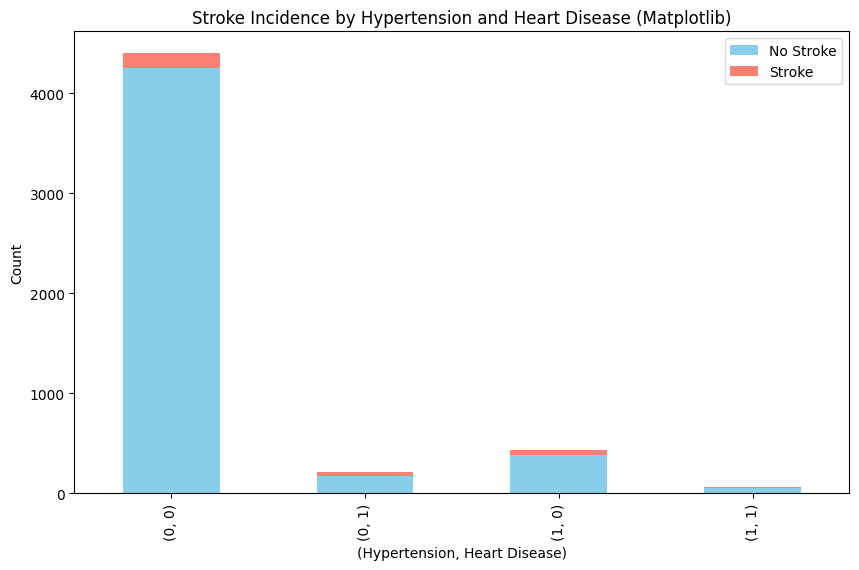

In [ ]:
# Using Matplotlib: Stacked Bar Plot
hypertension_heart_counts = df.groupby(['hypertension', 'heart_disease', 'stroke']).size().unstack(fill_value=0)
hypertension_heart_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10,6))
plt.title('Stroke Incidence by Hypertension and Heart Disease (Matplotlib)')
plt.xlabel('(Hypertension, Heart Disease)')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

**Observation**

The heatmap shows that the presence of both hypertension and heart disease significantly increases the likelihood of stroke.
The stacked bar plot indicates that individuals with both conditions have a markedly higher incidence of stroke compared to those with only one or none, underscoring the combined risk of these health conditions.

***Pairplot***

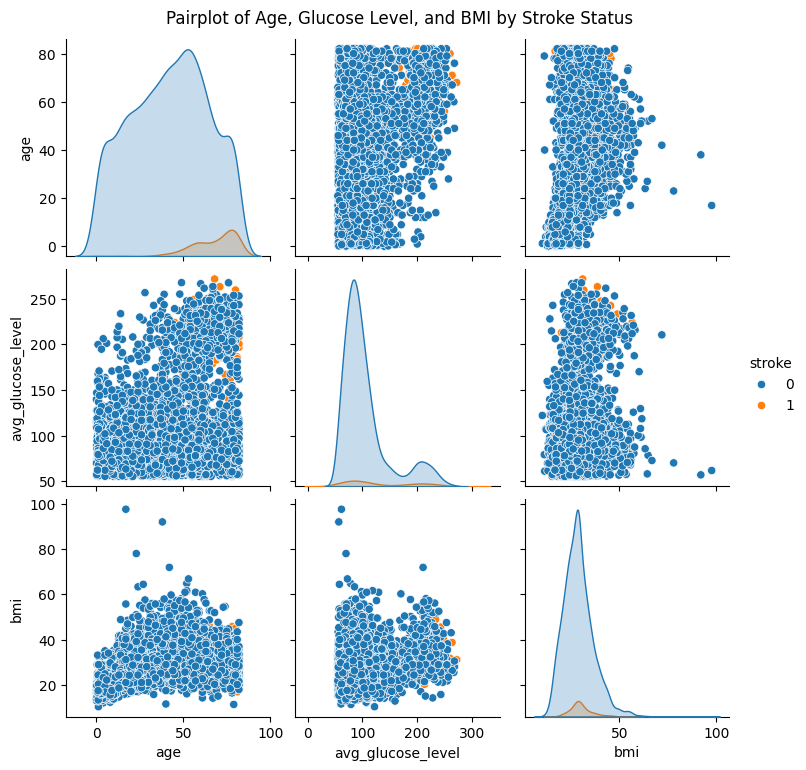

In [ ]:
# Pairplot of relevant numerical columns
# Using Seaborn
sns.pairplot(df, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
plt.suptitle('Pairplot of Age, Glucose Level, and BMI by Stroke Status', y=1.02)
plt.show()

Observation:

Strong clustering can be observed in certain combinations, especially in glucose and BMI among stroke patients.
Stroke patients generally show higher values across the board, with increased age, glucose, and BMI all visible in clusters.